In [1]:
import numpy as np

raw_data = np.genfromtxt('https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/x09.txt', skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

2.7 현재 간단한 딥러닝의 목표

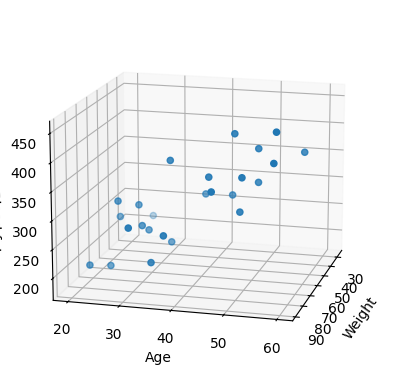

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

2.10 현재 우리의 목표

2.11 학습 대상 데이터를 추리고

In [3]:
x_data = np.array(raw_data[:,2:4], dtype = np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)


y_data = y_data.reshape((25,1))

2.12 원래 의도한 모델을 만들자

In [4]:
pip install TensorFlow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf

2023-10-31 17:54:13.262373: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 17:54:13.262411: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 17:54:13.262435: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 17:54:13.267628: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 17:54:13.947554: W tensorflow/compiler/

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1, input_shape =(2,)),])

model.compile(optimizer ='rmsprop', loss = 'mse')

2023-10-31 17:54:16.235783: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 17:54:16.280487: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 17:54:16.280673: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

2.15 summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2.17 다음은?

In [8]:
hist = model.fit(x_data, y_data, epochs = 5000)

Epoch 1/5000


2023-10-31 17:54:24.111448: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f89f4019e90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-31 17:54:24.111494: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-10-31 17:54:24.116314: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1/1 [==============================] - 2s 2s/step - loss: 183797.0000
Epoch 2/5000
1/1 [==============================] - 0s 5ms/step - loss: 183499.8750
Epoch 3/5000
1/1 [==============================] - 0s 6ms/step - loss: 183284.5469
Epoch 4/5000
1/1 [==============================] - 0s 5ms/step - loss: 183104.3594
Epoch 5/5000
1/1 [==============================] - 0s 5ms/step - loss: 182944.5625
Epoch 6/5000
1/1 [==============================] - 0s 5ms/step - loss: 182798.1875
Epoch 7/5000
1/1 [==============================] - 0s 6ms/step - loss: 182661.4062
Epoch 8/5000
1/1 [==============================] - 0s 6ms/step - loss: 182531.8125
Epoch 9/5000
1/1 [==============================] - 0s 5ms/step - loss: 182407.8750
Epoch 10/5000
1/1 [==============================] - 0s 6ms/step - loss: 182288.4219
Epoch 11/5000
1/1 [==============================] - 0s 5ms/step - loss: 182172.6250
Epoch 12/5000
1/1 [==============================] - 0s 7ms/step - loss: 182059.8438


2023-10-31 17:54:25.223280: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800
2023-10-31 17:54:25.274532: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 13/5000
1/1 [==============================] - 0s 8ms/step - loss: 181949.5938
Epoch 14/5000
1/1 [==============================] - 0s 7ms/step - loss: 181841.4844
Epoch 15/5000
1/1 [==============================] - 0s 6ms/step - loss: 181735.2188
Epoch 16/5000
1/1 [==============================] - 0s 6ms/step - loss: 181630.5469
Epoch 17/5000
1/1 [==============================] - 0s 6ms/step - loss: 181527.2031
Epoch 18/5000
1/1 [==============================] - 0s 5ms/step - loss: 181425.0781
Epoch 19/5000
1/1 [==============================] - 0s 5ms/step - loss: 181323.9844
Epoch 20/5000
1/1 [==============================] - 0s 5ms/step - loss: 181223.8125
Epoch 21/5000
1/1 [==============================] - 0s 4ms/step - loss: 181124.4219
Epoch 22/5000
1/1 [==============================] - 0s 5ms/step - loss: 181025.7656
Epoch 23/5000
1/1 [==============================] - 0s 6ms/step - loss: 180927.7188
Epoch 24/5000
1/1 [==============================] - 0s 6ms/step 

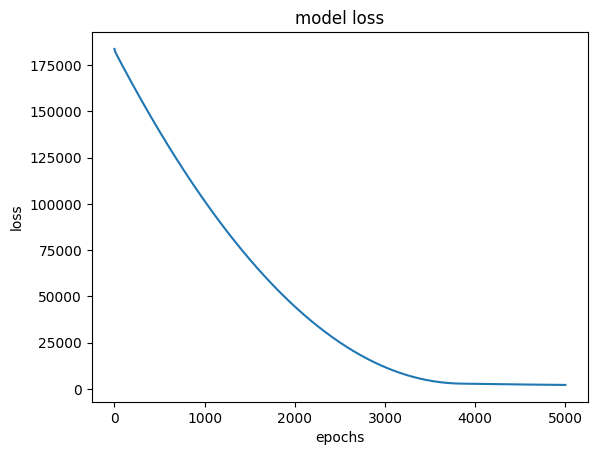

In [9]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

2.20 predict 해볼까?

In [10]:
model.predict(np.array([100,44]).reshape(1,2))

1/1 [==============================] - 0s 47ms/step


array([[391.57507]], dtype=float32)

In [11]:
model.predict(np.array([60,25]).reshape(1,2))

1/1 [==============================] - 0s 14ms/step


array([[231.08304]], dtype=float32)

2.22 가중치와 bias를 알고 싶다면

In [12]:
W_, b_ = model.get_weights()
print('Weight is : ', W_)
print('bias is : ', b_)


Weight is :  [[2.0283206]
 [4.1768007]]
bias is :  [4.9637723]


2.23 모델이 잘 만들어졌는지 확인하기 위해 데이터를 만들고

In [20]:
x = np.linspace(20, 100, 50).reshape(50,1)
y = np.linspace(10, 70, 50).reshape(50,1)

X = np.concatenate((x,y), axis =1)
Z = np.matmul(X, W_) + b_

2.24 그리기를 시도하자

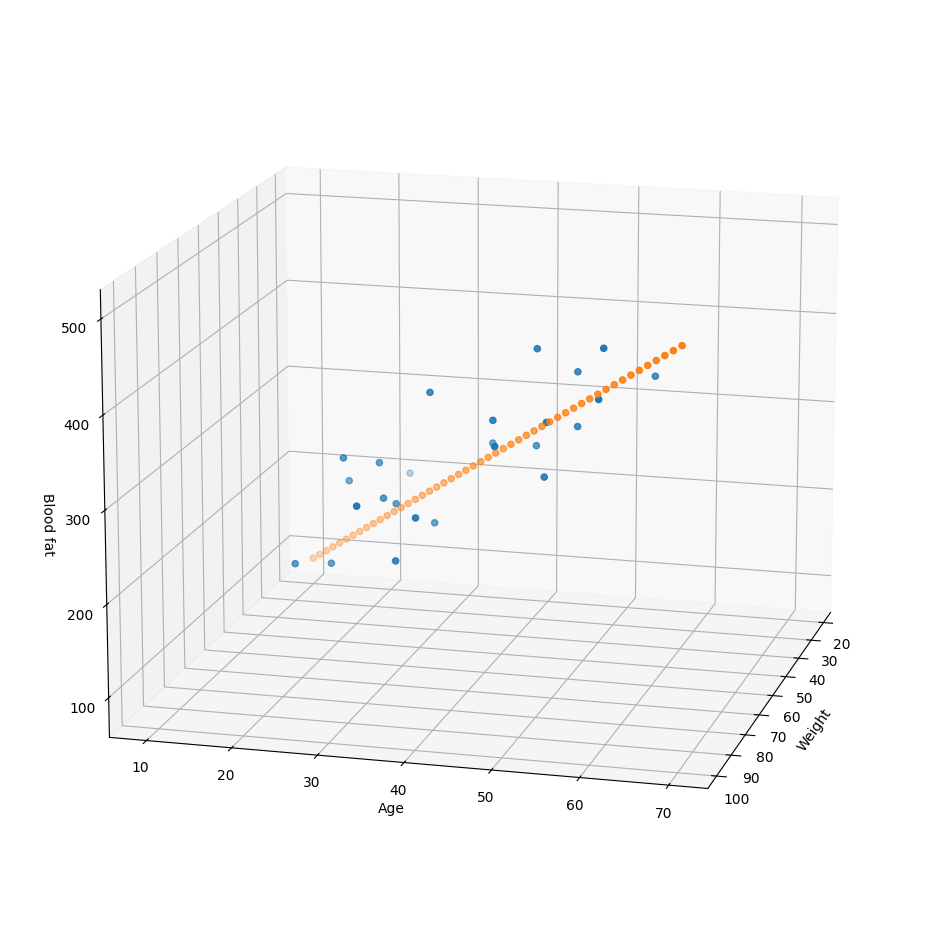

In [21]:
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs, ys, zs)
ax.scatter(x,y,Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

3 XOR 문제

3.1 XOR

#####3.2 선형 모델로는 XOR를 풀 수가 없다

3.3 간단히 데이터를 준비하고

In [26]:
import numpy as np

X = np.array([[0, 0],
              [1, 0],
              [0, 1],
              [1, 1] ])
y = np.array([[0], [1], [1], [0]])

3.4 모델은 간단히

In [27]:
model = tf. keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape =(2,)),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])

3.6 model.compile

In [35]:
model.compile(optimizer = tf.keras.optimizers.SGD(Ir = 0.1), loss ='mse')

TypeError: Ir is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


3.8 학습

In [36]:
hist = model.fit(X,y, epochs = 5000, batch_size =1)

Epoch 1/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2596
Epoch 2/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2595
Epoch 3/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2594
Epoch 4/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2593
Epoch 5/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2593
Epoch 6/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2592
Epoch 7/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2591
Epoch 8/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2590
Epoch 9/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2589
Epoch 10/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2588
Epoch 11/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2588
Epoch 12/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2587
Epoch 13/5000
4/4 [==============================

3.9 학습결과

In [37]:
model.predict(X)

1/1 [==============================] - 0s 36ms/step


array([[0.5083401 ],
       [0.48855588],
       [0.5117618 ],
       [0.4924907 ]], dtype=float32)

3.10 loss 상황

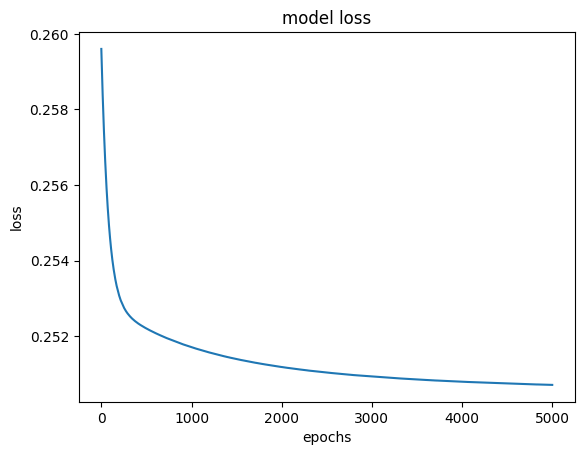

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

3.11 학습에서 찾은 가중치

In [47]:
for w in model.weights:
    print('---')
    print(w)

---
<tf.Variable 'dense_1/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.2791813 ,  0.16095759],
       [-0.18686385, -0.8147896 ]], dtype=float32)>
---
<tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([0.06835882, 0.10000671], dtype=float32)>
---
<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.96578234],
       [-0.29917836]], dtype=float32)>
---
<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-0.30896333], dtype=float32)>


4 이번에는 분류로~

4.1 iris 데이터

In [49]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

4.2 그런데 y는 이렇게 생겼다

In [50]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

4.3 One hot encoding

4.4 sklearn의 one hot encoding

In [51]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse = False, handle_unknown= 'ignore')
enc.fit(y.reshape(len(y),1))

/home/kang/venv/deep_running/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

4.5 이제 학습 준비가 되었다

In [52]:
enc.categories_

[array([0, 1, 2])]

In [53]:
y_onehot = enc.transform(y.reshape(len(y),1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y_onehot, test_size=0.2, random_state=13)

In [55]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(32, input_shape=(4, ), activation='relu'),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dense(32, activation = 'relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')])

4.9 activation

4.10 역전파 back-propagation

4.11 역전파에서는 sigmoid가 문제가 있다

sigmoid (0과 1 사이)

4.12 gradient vanishing

4.13 ReLU의 등장

4.14 softmax?

4.16 adam?

In [56]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2371 (9.26 KB)
Trainable params: 2371 (9.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


4.17 gradient decent는 배웠다

4.18 복습차원에서~

In [58]:
hist = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 2.2717 - accuracy: 0.3500
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.8476 - accuracy: 0.3500
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.5077 - accuracy: 0.3500
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.2571 - accuracy: 0.3500
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0790 - accuracy: 0.3500
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0107 - accuracy: 0.3583
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9561 - accuracy: 0.3500
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9251 - accuracy: 0.6167
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8940 - accuracy: 0.6500
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8501 - accuracy: 0.6500
Epoch 11/100
4/4 [===========

In [59]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.1158 - accuracy: 1.0000 - 114ms/epoch - 114ms/step


[0.11578932404518127, 1.0]

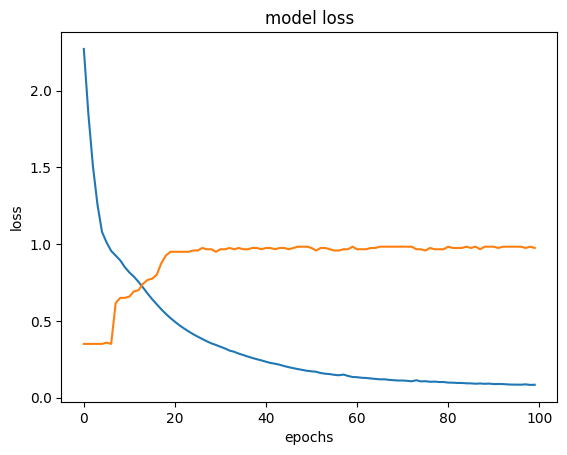

In [60]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()